In [5]:
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn.datasets import make_circles;
from sklearn.cluster import DBSCAN;
from sklearn import metrics;

In [6]:
def avaliar_clusterizacao(X, labels, y_true=None):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0);
    n_noise = list(labels).count(-1);
    
    print(f"Número de clusters encontrados: {n_clusters}");
    print(f"Número de pontos de ruído: {n_noise}");
    
    if n_clusters > 1:
        mask = labels != -1;
        if np.sum(mask) > 0:
            silhouette = metrics.silhouette_score(X[mask], labels[mask]);
            ch_score = metrics.calinski_harabasz_score(X[mask], labels[mask]);
            db_score = metrics.davies_bouldin_score(X[mask], labels[mask]);
            print(f"Silhouette Score: {silhouette:.3f}");
            print(f"Calinski-Harabasz Index: {ch_score:.3f}");
            print(f"Davies-Bouldin Index: {db_score:.3f}");
    else:
        print("Não há clusters suficientes para calcular métricas internas.");
    
    if y_true is not None:
        ari = metrics.adjusted_rand_score(y_true, labels);
        nmi = metrics.normalized_mutual_info_score(y_true, labels);
        print(f"Adjusted Rand Index (ARI): {ari:.3f}");
        print(f"Normalized Mutual Information (NMI): {nmi:.3f}");

    plt.figure(figsize=(6,6));
    plt.scatter(X[:,0], X[:,1], c=labels, cmap="plasma", s=20);
    plt.title("Resultados da Clusterização");
    plt.xlabel("Feature 1");
    plt.ylabel("Feature 2");
    plt.show();

Número de clusters encontrados: 15
Número de pontos de ruído: 14
Silhouette Score: 0.093
Calinski-Harabasz Index: 107.304
Davies-Bouldin Index: 0.633
Adjusted Rand Index (ARI): 0.539
Normalized Mutual Information (NMI): 0.513


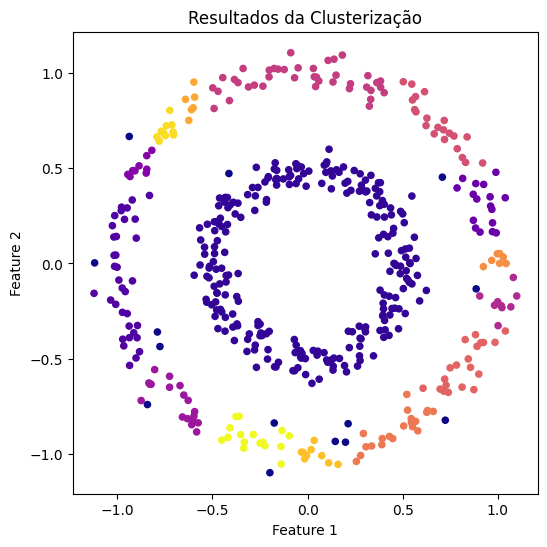

In [7]:
X, y_true = make_circles(n_samples=500, factor=0.5, noise=0.05);

dbscan = DBSCAN(eps=0.1, min_samples=5);
labels = dbscan.fit_predict(X);

avaliar_clusterizacao(X, labels, y_true);